In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import boxcluster
from boxcluster import mod
from boxcluster.modmax import ModMax
from boxcluster.modmax import largest_connected
from boxcluster.fake_data import generate_nested_data

In [3]:
import pandas as pd
import numpy as np
import networkx as nx

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_modules(modules, G):
    values = [modules[n] for n in G.nodes()]
    nx.draw(G, node_color=values)
    plt.show()

0 disconnected nodes removed


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


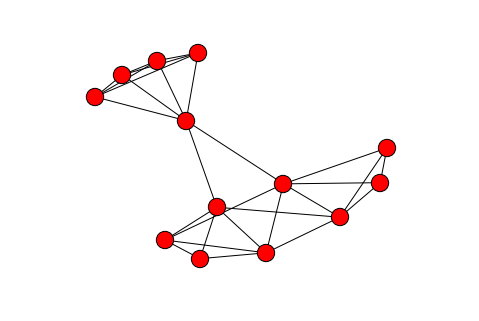

In [6]:
def get_graph(filename):
    G = nx.Graph()
    f = open(filename)
    data = f.readlines()
    edges = []
    for line in data:
        entry = map(int, line.rstrip().split())
        if entry:
            edges.append(tuple(entry))
    G.add_edges_from(edges)
    f.close()
    return G

graph_file = "./boxcluster/modularity/testnet.dat"
G = get_graph(graph_file)
# get the total number of edges
L0 = G.size()
# get the giant component
G = largest_connected(G)
L = G.size()
print(L0 - L, 'disconnected nodes removed')

nx.draw(G)
plt.show()

0.12130177514792906


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


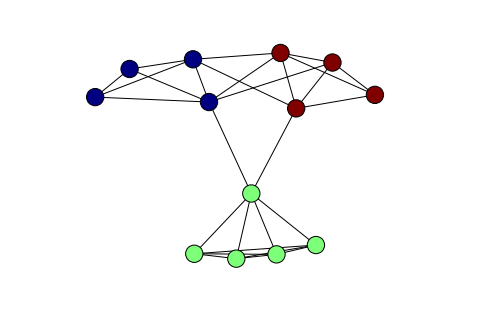

In [7]:
mm = ModMax(G)
fit_mods = mm(save_history=True)
print(fit_mods.fitness)
plot_modules(modules=mm.current, G=G)
plt.show()

# Show Optimization Progress

In [8]:
df = pd.DataFrame(mm.history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,1,0,False,0.001,-1.168639,-1.346154
1,2,0,False,0.001,-1.168639,-1.346154
2,3,0,False,0.001,-1.168639,-1.349112
3,4,0,False,0.001,-1.168639,-1.346154
4,5,0,False,0.001,-1.168639,-1.349112


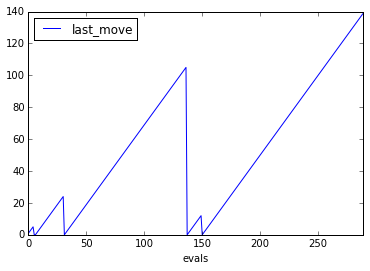

In [9]:
df[['last_move']].plot()

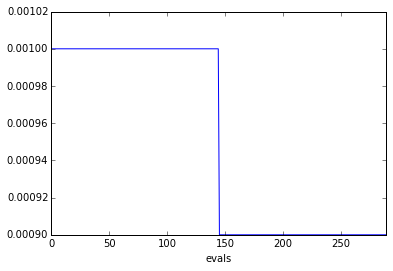

In [10]:
df['temp'].plot()

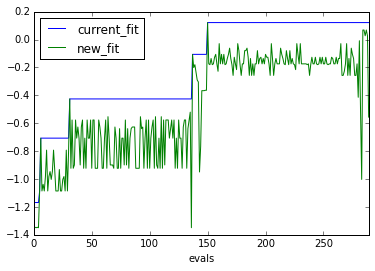

In [11]:
df[['current_fit', 'new_fit']].plot()